In [3]:
!pip install -U datasets # Fix error: NotImplementedError: Loading a dataset cached in a LocalFileSystem is not supported

In [4]:
!pip install -q transformers diffusers
# !pip install -q transformers datasets diffusers

In [ ]:
import torch
from transformers import pipeline
from diffusers import DiffusionPipeline
from datasets import load_dataset
import soundfile as sf
from IPython.display import Audio

device = 'cuda' if torch.cuda.is_available() else 'cpu'

print(device)



cuda


In [7]:
# Sentiment analysis
classifier = pipeline('sentiment-analysis', device=device)
result = classifier("I'm super excited to be on the way to LLM mastery!")
print(result)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cuda


[{'label': 'POSITIVE', 'score': 0.9993460774421692}]


In [8]:
# Named Entity Recognition
ner = pipeline('ner', grouped_entities=True, device=device)
result = ner('Barak Obama is the 44th president of the United State')
print(result)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

Device set to use cuda


[{'entity_group': 'PER', 'score': np.float32(0.9992203), 'word': 'Barak Obama', 'start': 0, 'end': 11}, {'entity_group': 'LOC', 'score': np.float32(0.9311379), 'word': 'United State', 'start': 41, 'end': 53}]


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/token_classification.py:170: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.SIMPLE"` instead.
  warnings.warn(


In [10]:
# Question Answering with context
question_answer = pipeline('question-answering', device=device)
result = question_answer(question="who was the 44th president of the United State?", context="Barak Obama")
print(result)

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Device set to use cuda


{'score': 0.9909976124763489, 'start': 0, 'end': 11, 'answer': 'Barak Obama'}


In [11]:
# Text Sumarization
summarizer = pipeline('summarization', device=device)
text = "Hugging Face Transformers is an open-source Python library that provides access to thousands of pre-trained Transformers models for natural language processing (NLP), computer vision, audio tasks, and more. It simplifies the process of implementing Transformer models by abstracting away the complexity of training or deploying models in lower level ML frameworks like PyTorch, TensorFlow and JAX."
summary = summarizer(text, max_length=50, min_length=20, do_sample=False)
print(summary)

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

Device set to use cuda


[{'summary_text': ' Hugging Face Transformers is an open-source Python library that provides access to thousands of pre-trained Transformers models . It simplifies the process of implementing Transformer models by abstracting away the complexity of training or deploying models in lower level'}]


In [13]:
# Translation
translator = pipeline('translation_en_to_fr', device=device)
text = "Hugging Face Transformers is an open-source Python library that provides access to thousands of pre-trained Transformers models for natural language processing (NLP), computer vision, audio tasks, and more. It simplifies the process of implementing Transformer models by abstracting away the complexity of training or deploying models in lower level ML frameworks like PyTorch, TensorFlow and JAX."
result = translator(text)
print(result)

No model was supplied, defaulted to google-t5/t5-base and revision a9723ea (https://huggingface.co/google-t5/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Device set to use cuda


[{'translation_text': "Hugging Face Transformers est une bibliothèque Python libre qui offre l'accès à des milliers de modèles de Transformers pré-traités pour le traitement du langage naturel (NLP), la vision informatique, les tâches audio et plus encore."}]


In [14]:
# Classification
classification = pipeline('zero-shot-classification', device=device)
result = classification('Hugging Face Transformers is an open-source Python library is amazing', candidate_labels=['technology', 'sports', 'politics'])
print(result)

No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda


{'sequence': 'Hugging Face Transformers is an open-source Python library is amazing', 'labels': ['technology', 'sports', 'politics'], 'scores': [0.99041748046875, 0.00631758151575923, 0.0032649366185069084]}


In [15]:
# Text Generation
generator = pipeline('text-generation', device=device)
result = generator("If there's one thing I want you to remember about using Hugging Face pipelines, It is")
print(result)

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "If there's one thing I want you to remember about using Hugging Face pipelines, It is that you should be working with people all over the world who you trust very much.\n\nBecause that's exactly what I'm talking about. And this"}]


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

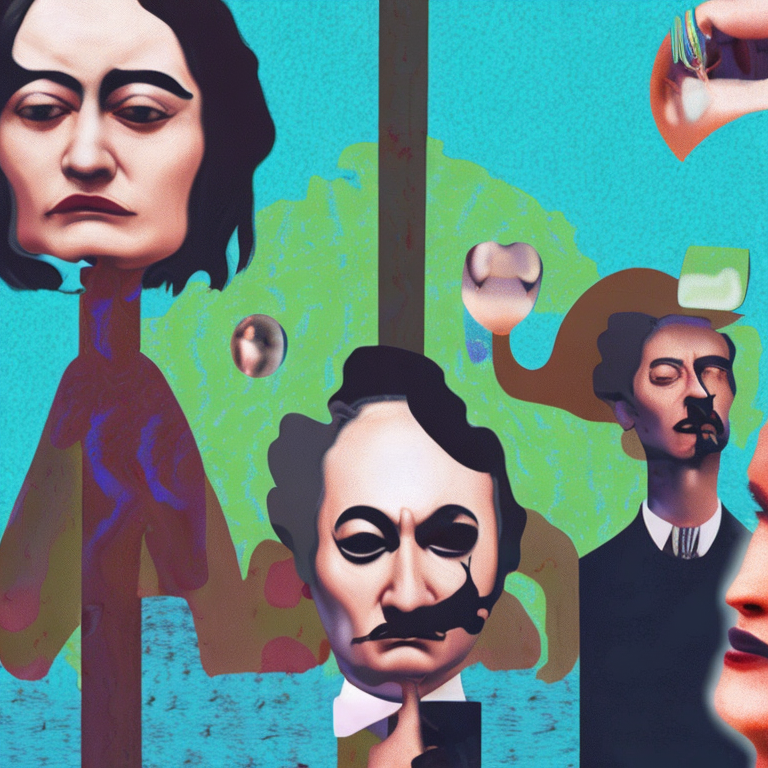

In [16]:
# Image Generation
image_generator  = DiffusionPipeline.from_pretrained(
    'stabilityai/stable-diffusion-2',
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant='fp16'
  ).to(device)
text = 'A class od Data Scientists learning about AI, in the surreal style of Salvador Dali'
result = image_generator(prompt=text)
image = result.images[0]
image

In [1]:
!pip install -U datasets

In [8]:
# Audio Generation
audio_generator = pipeline('text-to-speech', 'microsoft/speecht5_tts', device=device)
embeddings_dataset = load_dataset('Matthijs/cmu-arctic-xvectors', split="validation")
speaker_embeddings = embeddings_dataset[7306]["xvector"]
speaker_embeddings = torch.tensor(speaker_embeddings).unsqueeze(0)
speech = audio_generator(
    'A class od Data Scientists learning about AI, in the surreal style of Salvador Dali',
    forward_params={'speaker_embeddings': speaker_embeddings}
)
print(speech)
audio_file = 'speech.wav'
sf.write(audio_file, speech['audio'], samplerate=speech['sampling_rate'])
Audio(audio_file)

Device set to use cuda


{'audio': array([-6.3228617e-05,  2.2502316e-04,  1.8745114e-04, ...,
       -2.6190022e-04, -1.3310715e-04, -7.6481549e-05], dtype=float32), 'sampling_rate': 16000}
